In [364]:
## import
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [365]:
#read loan csv file
loan_Data = pd.read_csv("loan.csv")

In [366]:
#read the data rows and columns
loan_Data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [367]:
#read rows and columns
loan_Data.shape

(39717, 111)

In [368]:
#detecting missing values
loan_Data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### A lot of columns with null values so remove them

In [369]:
loan_Data.dropna(axis = 1, how = 'all', inplace = True)
loan_Data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Let's remove columns(which having single values) because we can not use them in EDA.

In [370]:
single_value_columns = [col for col in loan_Data.columns if loan_Data[col].nunique() == 1]
print(single_value_columns)
loan_Data.drop(single_value_columns, axis = 1, inplace = True)
# loan_Data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_Data.head()

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### we can remove few more columns from the dataset that are not contributing to the loan defaulting analysis.
- id, member_id, last_credit_pull_d,url, title, emp_title, zip_code, addr_state,desc, out_prncp_inv, total_pymnt_inv,delinq_2yrs, revol_bal,out_prncp,total_rec_prncp,total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d,last_pymnt_amnt, next_pymnt_d,mths_since_last_delinq, mths_since_last_record

In [371]:
loan_Data.drop(["id", "member_id", "last_credit_pull_d","url", "title", "emp_title", "zip_code", "addr_state","desc", "out_prncp_inv", "total_pymnt_inv","delinq_2yrs", "revol_bal","out_prncp","total_rec_prncp","total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d","mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [372]:
loan_Data.shape
loan_Data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,credit_card,27.65,Jan-85,1,3,0,83.70%,9,5863.155187,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,car,1.00,Apr-99,5,3,0,9.40%,4,1008.710000,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,small_business,8.72,Nov-01,2,2,0,98.50%,10,3005.666844,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,other,20.00,Feb-96,1,10,0,21%,37,12231.890000,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,other,17.94,Jan-96,0,15,0,53.90%,38,3513.330000,0.0


In [373]:
loan_Data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'total_pymnt',
       'pub_rec_bankruptcies'],
      dtype='object')

### we will remove loan status "Current" as we need to consider only Fully Paid and Charged Off loan status 

In [374]:
loan_Data = loan_Data[loan_Data.loan_status != "Current"]
loan_Data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [375]:
loan_Data.shape

(38577, 24)

### Check and remove missing values

In [376]:
loan_Data.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
total_pymnt                0
pub_rec_bankruptcies     697
dtype: int64

 - columns with missing values are "emp_length"

In [377]:
loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  dti                   38

### Calculate mode for the column "emp_length"

In [378]:
print("emp_length Mode : " + loan_Data['emp_length'].mode())
loan_Data.emp_length.value_counts()

0    emp_length Mode : 10+ years
Name: emp_length, dtype: object


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

### Filling the mode of columns 'emp_length' with mode value

In [379]:
loan_Data['emp_length'].fillna(loan_Data['emp_length'].mode()[0],inplace=True)
loan_Data.emp_length.isnull().sum()

np.int64(0)

In [380]:
loan_Data.dropna(subset = ['revol_util'] , inplace = True)
loan_Data.revol_util.isna().sum()

np.int64(0)

## Standardizing the data for below columns
- "revol_util", 'int_rate' remove '%'' and convert to float
- "emp_length" : assumptions 0 if < 1 , 10 if 10+ else whatever value we have

In [381]:
loan_Data['revol_util'] = pd.to_numeric(loan_Data['revol_util'].str.replace('%', ''))
loan_Data['revol_util'].info()
loan_Data['revol_util']

<class 'pandas.core.series.Series'>
Index: 38527 entries, 0 to 39716
Series name: revol_util
Non-Null Count  Dtype  
--------------  -----  
38527 non-null  float64
dtypes: float64(1)
memory usage: 602.0 KB


0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 38527, dtype: float64

In [382]:
loan_Data['int_rate'] = pd.to_numeric(loan_Data['int_rate'].str.replace('%', ''))
loan_Data['int_rate'].info()
loan_Data['int_rate']

<class 'pandas.core.series.Series'>
Index: 38527 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
38527 non-null  float64
dtypes: float64(1)
memory usage: 602.0 KB


0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38527, dtype: float64

In [383]:
loan_Data.emp_length = loan_Data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))

In [384]:
loan_Data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,credit_card,27.65,Jan-85,1,3,0,83.7,9,5863.155187,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,car,1.00,Apr-99,5,3,0,9.4,4,1008.710000,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,small_business,8.72,Nov-01,2,2,0,98.5,10,3005.666844,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,other,20.00,Feb-96,1,10,0,21.0,37,12231.890000,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,wedding,11.20,Nov-04,3,9,0,28.3,12,5632.210000,0.0


### find the outliers in the data 'annual_inc' and replace the outliers with the median of the column

<Axes: xlabel='annual_inc'>

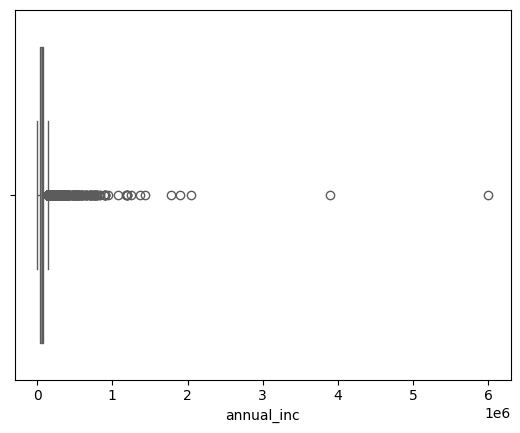

In [385]:
sns.boxplot(x= loan_Data['annual_inc'])

#### Clearly indincating the presence of outliers.
- So, Removing them.
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- So, considering threshold for removing outliers as 0.95

In [386]:
quantiles = loan_Data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantiles

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [387]:
quantile95 = loan_Data['annual_inc'].quantile(0.95)
loan_Data = loan_Data[loan_Data.annual_inc <= quantile95]

<Axes: xlabel='annual_inc'>

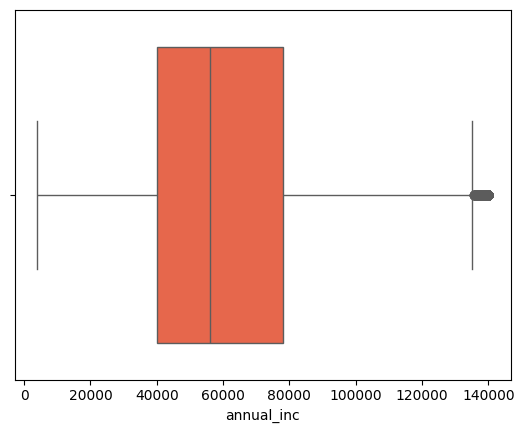

In [388]:
sns.boxplot(x=loan_Data.annual_inc)

### Now the "annual_inc" data looks good and proceeding next.
- Let's analyze other numerical variables which could possibly have outliers.
- dti
- loan_amnt
- funded_amnt_inv 

<Axes: xlabel='dti'>

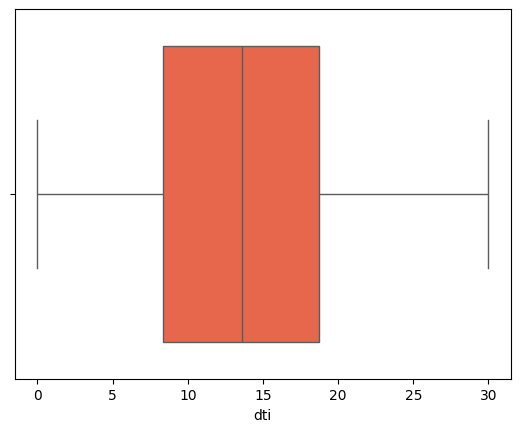

In [389]:
sns.boxplot(x=loan_Data.dti)

<Axes: xlabel='loan_amnt'>

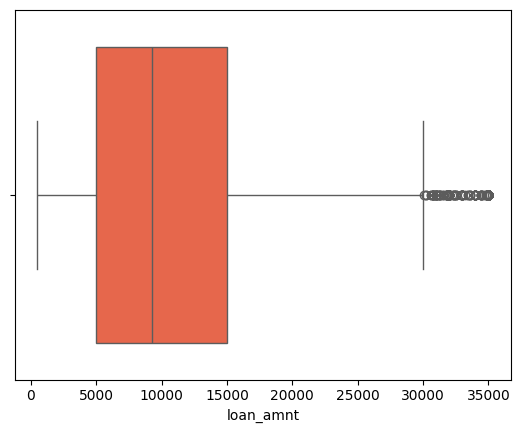

In [390]:
sns.boxplot(x=loan_Data.loan_amnt)

In [391]:
loan_Data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: xlabel='funded_amnt_inv'>

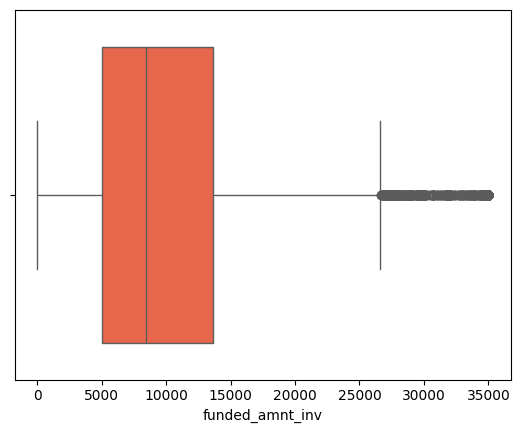

In [392]:
sns.boxplot(x=loan_Data.funded_amnt_inv)

In [393]:
loan_Data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

- Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

## Visualizing Categorical Data 
### Analyzing - Grade column correct now, now we correct the subgrade variable(get only integers part)
- We are using the grade and sub grade variable to plot the data for 'charged off' loan_status.

<Axes: xlabel='loan_status', ylabel='count'>

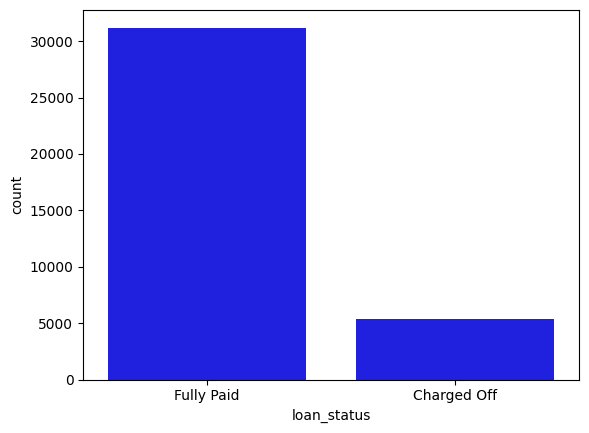

In [394]:
sns.countplot(x = 'loan_status', data = loan_Data,color='blue')

### Getting integer part of sub grade column

In [395]:
loan_Data.sub_grade = pd.to_numeric(loan_Data.sub_grade.apply(lambda x : x[-1]))
loan_Data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

### Count of each loan status respectively Group by grade

<Axes: xlabel='grade', ylabel='count'>

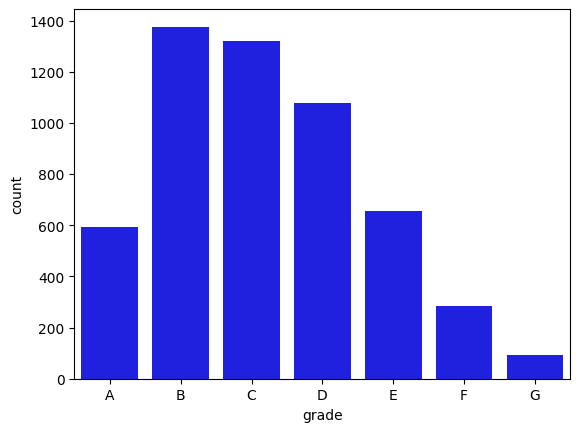

In [396]:
sns.countplot(x = 'grade', data = loan_Data[loan_Data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], color='blue')
# fig, ax = plt.subplots(figsize=(12,7))
# sns.set_palette("paste1")

### Count of each loan status respectively Group by grade and subgrade

<Axes: xlabel='grade', ylabel='count'>

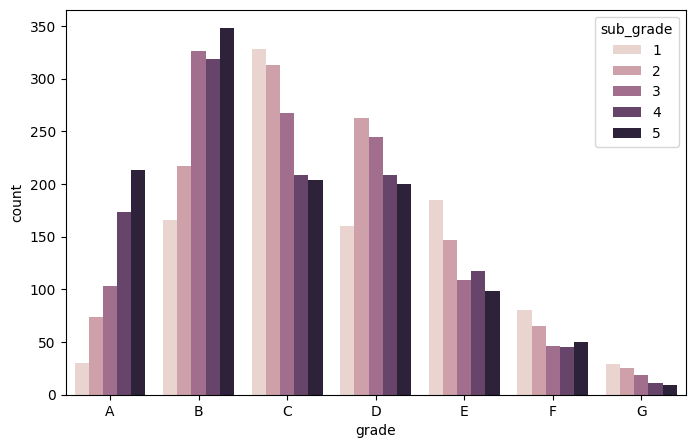

In [397]:
plt.subplots(figsize=(8,5))
sns.countplot(x = 'grade', hue='sub_grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,data = loan_Data[loan_Data.loan_status == 'Charged Off'])

####  Analyzing home_ownership
- Check unique values in the home_ownership column and check the count of each value.


In [398]:
loan_Data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [399]:

loan_Data.home_ownership.value_counts()


home_ownership
RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          91
NONE            3
Name: count, dtype: int64

- There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [400]:
loan_Data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [401]:
#checking unique values for home_ownership again
loan_Data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

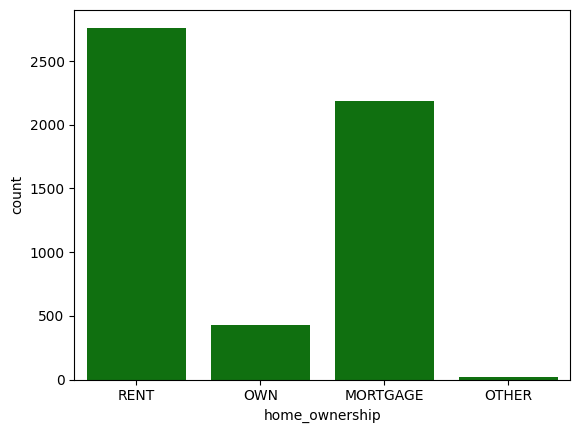

In [402]:
sns.countplot(x='home_ownership', data=loan_Data[loan_Data['loan_status']=='Charged Off'],color='green')

####  Analyzing purpose

<Axes: xlabel='count', ylabel='purpose'>

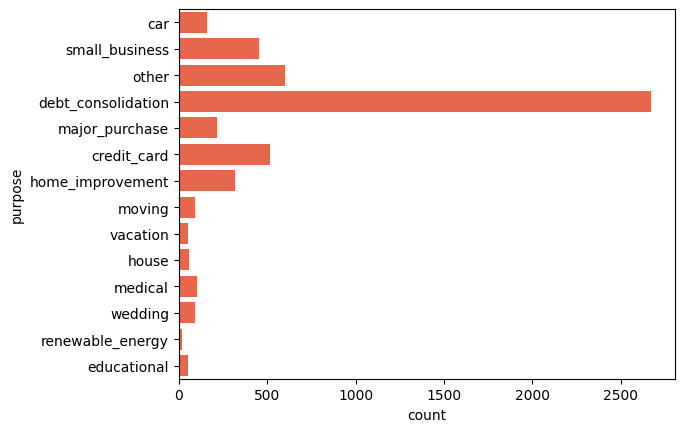

In [403]:
sns.countplot(y ='purpose', data=loan_Data[loan_Data.loan_status == 'Charged Off'])


#### Bin creation for some numerical variable so that we can use these catergorical variable it in our model

In [404]:
loan_Data['annual_inc_groups'] = pd.cut(loan_Data['annual_inc'], bins=5,precision =0,labels =['(3-31)k','(31-58)k','(58-85)k','(85-112)k','(112-140)k'])
loan_Data['revol_util_groups'] = pd.cut(loan_Data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_Data['open_acc_groups'] = pd.cut(loan_Data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_Data['total_acc_groups'] = pd.cut(loan_Data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_Data['int_rate_groups'] = pd.cut(loan_Data['int_rate'], bins=5,precision =0,labels=['(5-9)%','(9-13)%','(13-17)%','(17-21)%','(21-24)%'])

In [405]:
# Viewing new bins created
loan_Data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies,annual_inc_groups,revol_util_groups,open_acc_groups,total_acc_groups,int_rate_groups
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,...,0,83.7,9,5863.155187,0.0,(3-31)k,80-100,2-10,2-20,(9-13)%
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,...,0,9.4,4,1008.710000,0.0,(3-31)k,0-20,2-10,2-20,(13-17)%
2,2400,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,...,0,98.5,10,3005.666844,0.0,(3-31)k,80-100,2-10,2-20,(13-17)%
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,...,0,21.0,37,12231.890000,0.0,(31-58)k,20-40,2-10,20-37,(13-17)%
5,5000,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,...,0,28.3,12,5632.210000,0.0,(31-58)k,20-40,2-10,2-20,(5-9)%


#### Analyzing interest rate groups

Text(0.5, 0, 'Interest Rate')

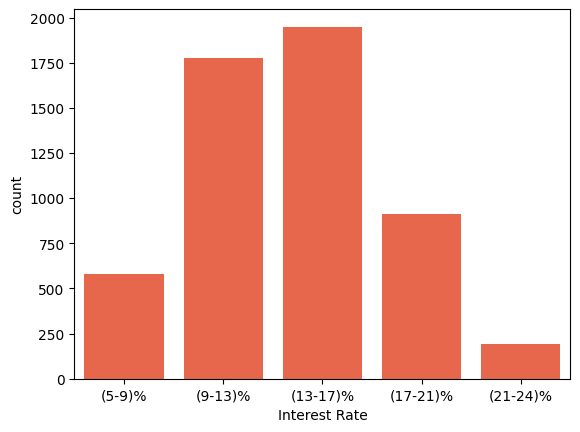

In [406]:
sns.countplot(x='int_rate_groups', data=loan_Data[loan_Data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')

### Analyzing emp length

<Axes: xlabel='emp_length', ylabel='count'>

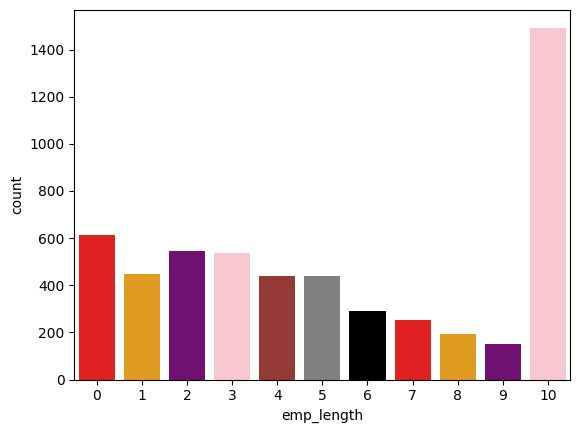

In [407]:
colors = ['red', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
emp_length_order = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
sns.countplot(x='emp_length', data=loan_Data[loan_Data.loan_status == 'Charged Off'], order=emp_length_order, palette=colors)

#### Analyzing remaining grouped columns open_acc,revol_util,total_acc,annual_inc

Text(0.5, 0, 'open_Acc')

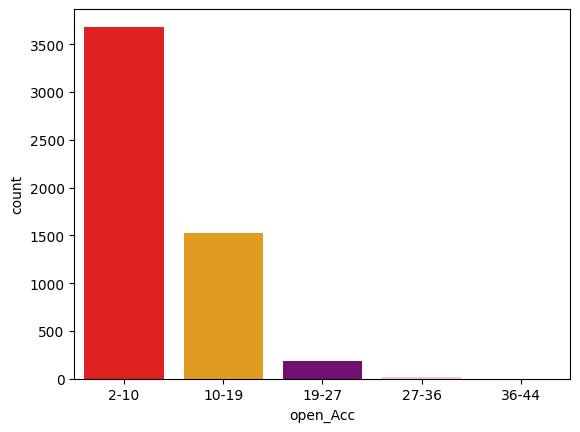

In [408]:

colors = ['red', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
sns.countplot(x='open_acc_groups', data=loan_Data[loan_Data.loan_status == 'Charged Off'],palette=colors)
plt.xlabel('open_Acc')

Text(0.5, 0, 'Revol Util')

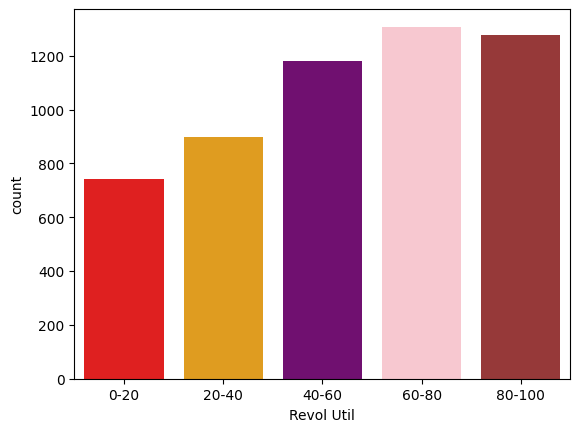

In [409]:
colors = ['red', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
sns.countplot(x='revol_util_groups', data=loan_Data[loan_Data.loan_status == 'Charged Off'],palette=colors)
plt.xlabel('Revol Util')

Text(0.5, 0, 'Total Acc')

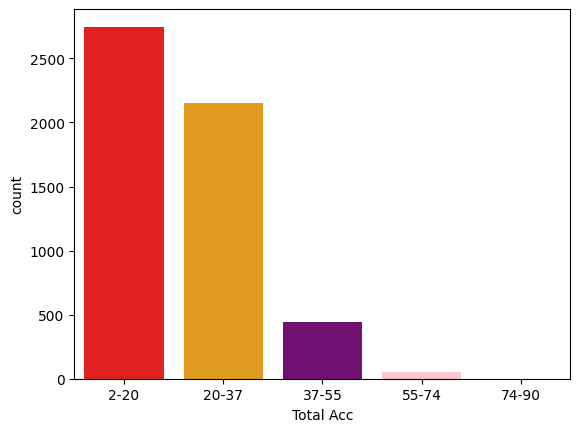

In [410]:
colors = ['red', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
sns.countplot(x='total_acc_groups', data=loan_Data[loan_Data.loan_status == 'Charged Off'], palette=colors)
plt.xlabel('Total Acc')

Text(0.5, 0, 'Annual Inc')

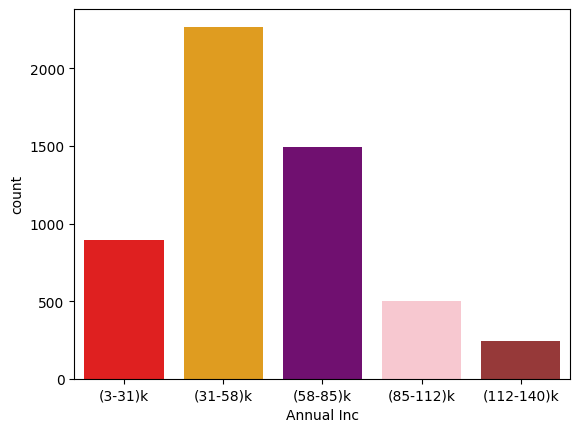

In [411]:
colors = ['red', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
sns.countplot(x='annual_inc_groups', data=loan_Data[loan_Data.loan_status == 'Charged Off'],palette=colors)
plt.xlabel('Annual Inc')

<Axes: xlabel='term', ylabel='count'>

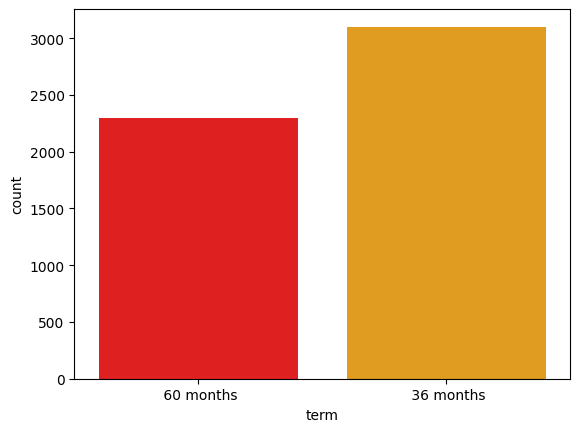

In [412]:
colors = ['red', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
sns.countplot(x='term', data=loan_Data[loan_Data['loan_status']=='Charged Off'],palette=colors)

<Axes: xlabel='verification_status', ylabel='count'>

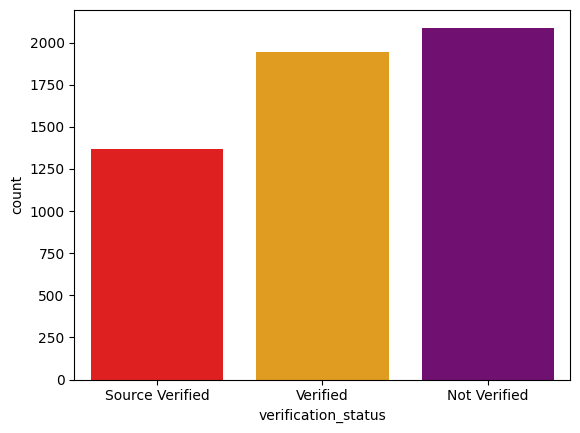

In [413]:
colors = ['red', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
sns.countplot(x='verification_status', data=loan_Data[loan_Data['loan_status']=='Charged Off'],palette=colors)

<Axes: xlabel='inq_last_6mths', ylabel='count'>

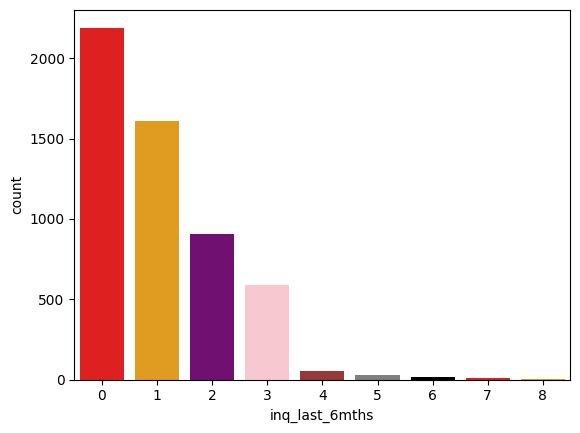

In [414]:
colors = ['red', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
sns.countplot(x='inq_last_6mths', data=loan_Data[loan_Data['loan_status']=='Charged Off'],palette=colors)

<Axes: xlabel='pub_rec', ylabel='count'>

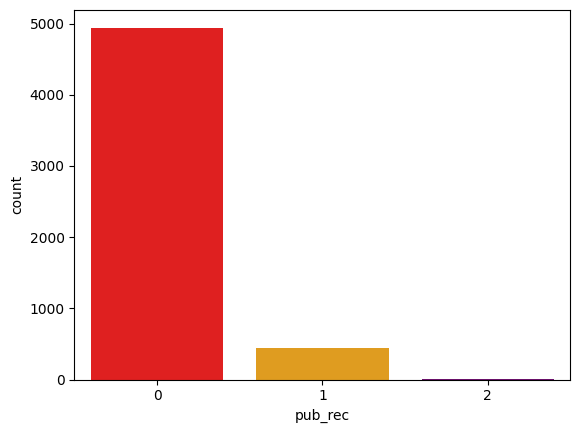

In [415]:
colors = ['red', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
sns.countplot(x='pub_rec', data=loan_Data[loan_Data['loan_status']=='Charged Off'],palette=colors)

- Analyzing issued month and issue_year


In [416]:
## Extracting month and year
loan_Data[['issue_month', 'issue_year']] = loan_Data['issue_d'].str.split('-', expand=True)

In [417]:
loan_Data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,total_pymnt,pub_rec_bankruptcies,annual_inc_groups,revol_util_groups,open_acc_groups,total_acc_groups,int_rate_groups,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,...,9,5863.155187,0.0,(3-31)k,80-100,2-10,2-20,(9-13)%,Dec,11
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,...,4,1008.710000,0.0,(3-31)k,0-20,2-10,2-20,(13-17)%,Dec,11
2,2400,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,...,10,3005.666844,0.0,(3-31)k,80-100,2-10,2-20,(13-17)%,Dec,11
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,...,37,12231.890000,0.0,(31-58)k,20-40,2-10,20-37,(13-17)%,Dec,11
5,5000,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,...,12,5632.210000,0.0,(31-58)k,20-40,2-10,2-20,(5-9)%,Dec,11


<Axes: xlabel='issue_year', ylabel='count'>

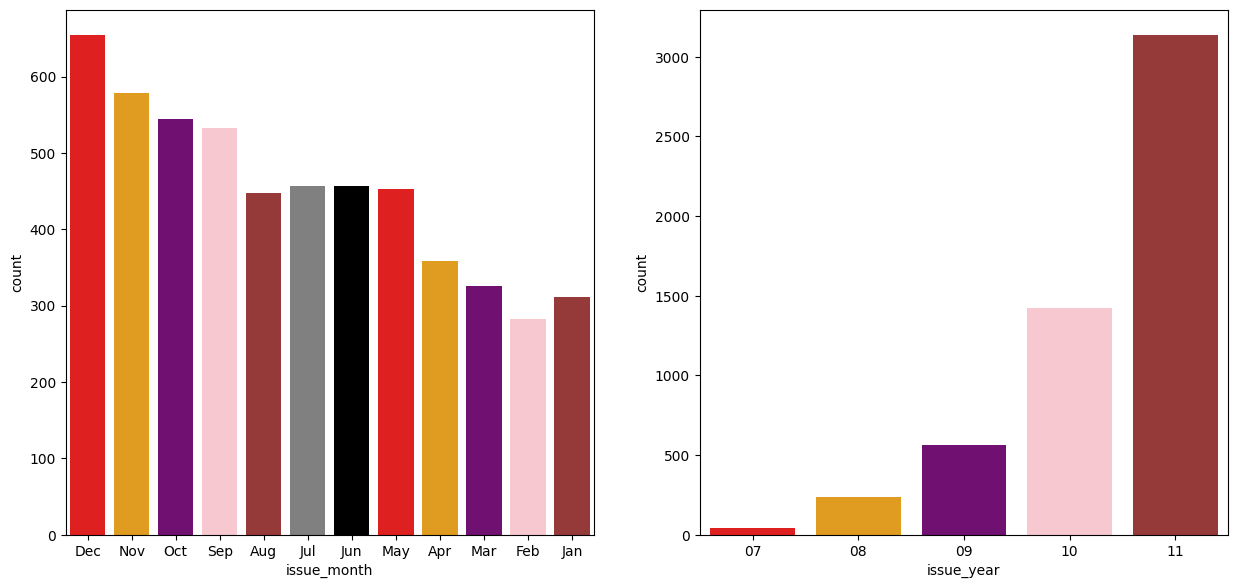

In [418]:
plt.figure(figsize=(15,15))
plt.subplot(221)
colors = ['red', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
sns.countplot(x='issue_month', data=loan_Data[loan_Data['loan_status']=='Charged Off'],palette=colors)
plt.subplot(222)
issue_year_order = loan_Data.groupby('issue_year').size().sort_values(ascending=True).index
sns.countplot(x='issue_year', data=loan_Data[loan_Data['loan_status']=='Charged Off'],order=issue_year_order,palette=colors)

- Maximum Loans are defaulted when loan approve in December month and year 2011.

- Now Analyzing loan_amnt,funded_amnt_inv, installment,dti columns


In [419]:
loan_Data['loan_amnt_groups'] = pd.cut(loan_Data['loan_amnt'], bins=7,precision =0,labels=['(0-5)k','(5-10)k','(10-15)k','(15-20)k','(20-25)k','(25-30)k','(30-35)k'])
loan_Data['funded_amnt_inv_groups'] = pd.cut(loan_Data['funded_amnt_inv'], bins=7,labels=['(0-5)k','(5-10)k','(10-15)k','(15-20)k','(20-25)k','(25-30)k','(30-35)k'])
loan_Data['installment_groups'] = pd.cut(loan_Data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_Data['dti_groups'] = pd.cut(loan_Data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
loan_Data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util_groups,open_acc_groups,total_acc_groups,int_rate_groups,issue_month,issue_year,loan_amnt_groups,funded_amnt_inv_groups,installment_groups,dti_groups
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,...,80-100,2-10,2-20,(9-13)%,Dec,11,(0-5)k,(0-5)k,145-274,24-30
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,...,0-20,2-10,2-20,(13-17)%,Dec,11,(0-5)k,(0-5)k,14-145,0-6
2,2400,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,...,80-100,2-10,2-20,(13-17)%,Dec,11,(0-5)k,(0-5)k,14-145,6-12
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,...,20-40,2-10,20-37,(13-17)%,Dec,11,(5-10)k,(5-10)k,274-403,18-24
5,5000,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,...,20-40,2-10,2-20,(5-9)%,Dec,11,(0-5)k,(0-5)k,145-274,6-12


-Plots for loan_amnt_groups,funded_amnt_inv_groups, installment_groups,dti_groups columns

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

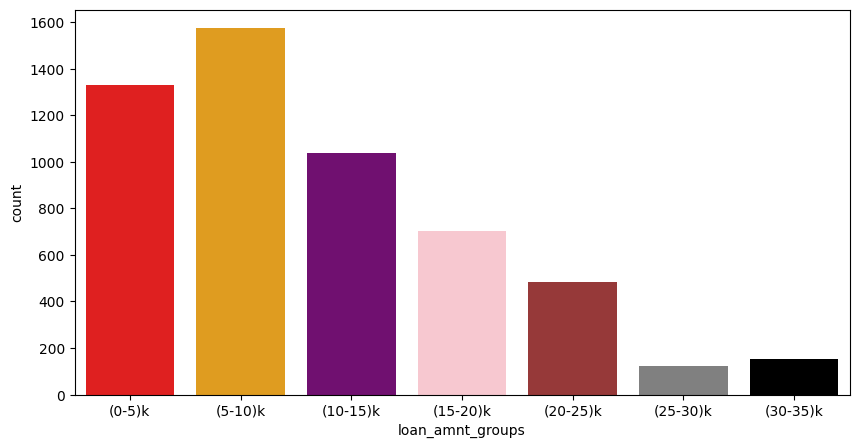

In [420]:
plt.subplots(figsize = (10,5))
colors = ['red', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
sns.countplot(x='loan_amnt_groups', data=loan_Data[loan_Data['loan_status']=='Charged Off'],palette=colors)

<Axes: xlabel='funded_amnt_inv_groups', ylabel='count'>

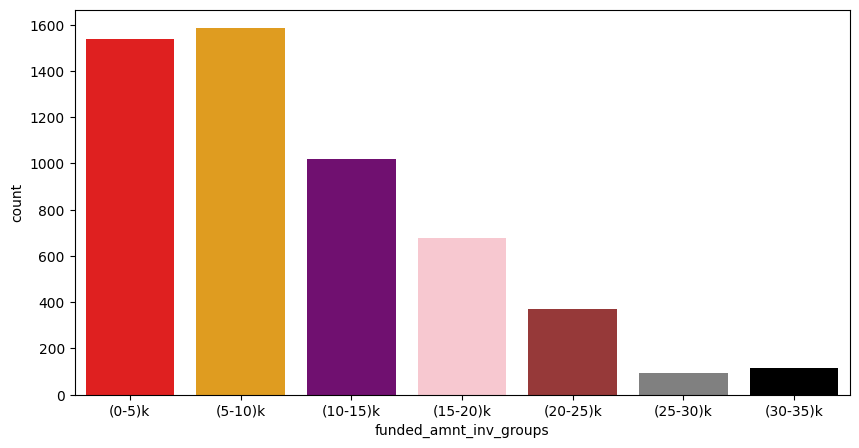

In [421]:
plt.subplots(figsize = (10,5))
colors = ['red', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
sns.countplot(x='funded_amnt_inv_groups', data=loan_Data[loan_Data['loan_status']=='Charged Off'],palette=colors)

<Axes: xlabel='installment_groups', ylabel='count'>

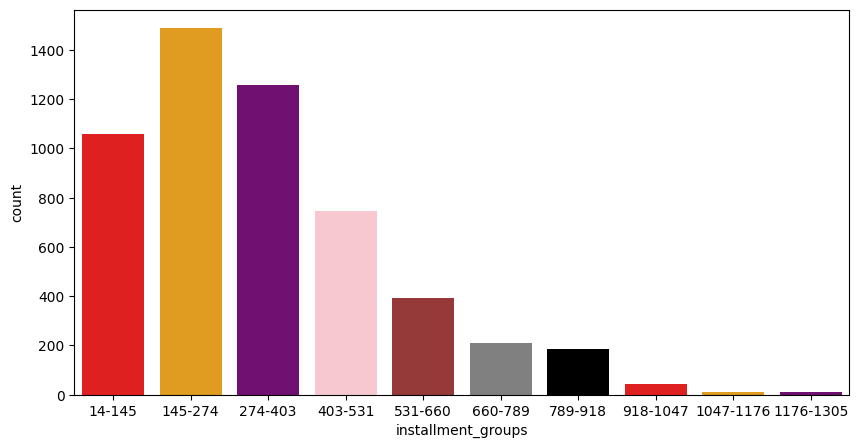

In [422]:
plt.subplots(figsize = (10,5))
colors = ['red', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
sns.countplot(x='installment_groups', data=loan_Data[loan_Data['loan_status']=='Charged Off'],palette=colors)

<Axes: xlabel='dti_groups', ylabel='count'>

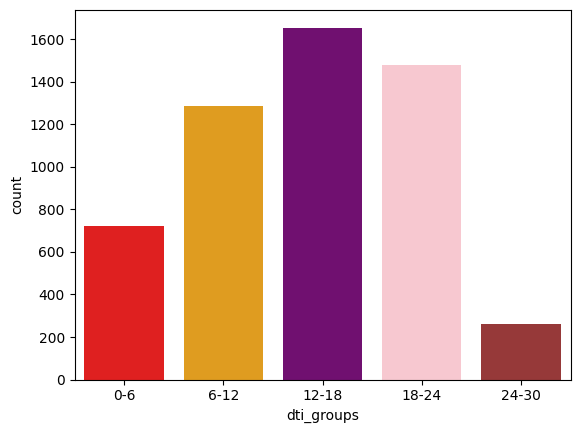

In [423]:
colors = ['red', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
sns.countplot(x='dti_groups', data=loan_Data[loan_Data['loan_status']=='Charged Off'],palette=colors)

# Observations

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 

- Applicants having house_ownership as 'RENT'
- When the loan purpose is 'debt_consolidation'
- Applicants receive interest at the rate of 13-17%
- Applicants have an income of range 31201 - 58402
- Applicants have 2-10 open_acc
- Applicants with employement length of 10 in years
- When funded amount by investor is between (5-10)k
- Loan amount -> between 5429 - 10357 (5-10)k
- When monthly installments are between 145-274
- Term of 36 months
- Loan status is Not verified
- Number of enquiries in last 6 months is 0
- Number of derogatory public records is 0
- Grade is 'B'
- Sub grade of 'B5' level.
- Dti is in between 12-18
- Maximum Loans are defaulted when loan approve in December month and year 2011.
- When revol_util is between 60-80
- Whe total_acc is between 2-20
- when annual_inc is between (31-58)k

### Analysing applicant annual income with other columns to do more analysis and insights

#### Annual income vs loan purpose with hue as loan status

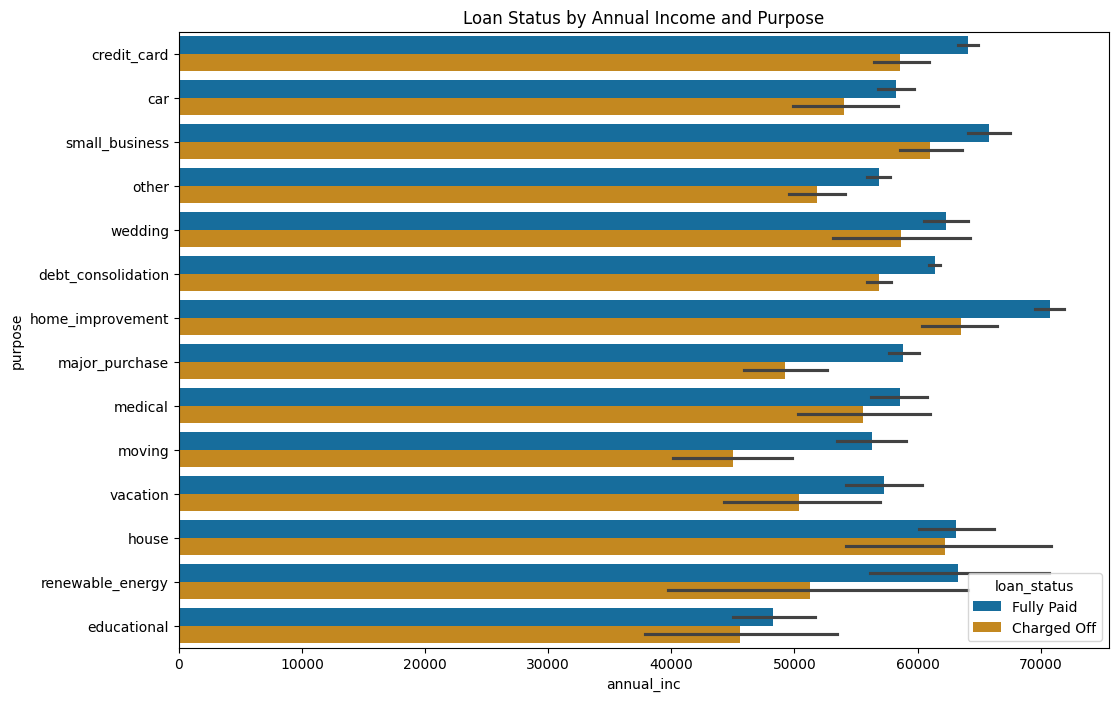

In [424]:
plt.figure(figsize=(12,8))
plt.title('Loan Status by Annual Income and Purpose')
sns.barplot(data =loan_Data, x='annual_inc', y='purpose', hue ='loan_status',palette="colorblind")
plt.show()

#### Annual income vs home ownership with hue as loan status

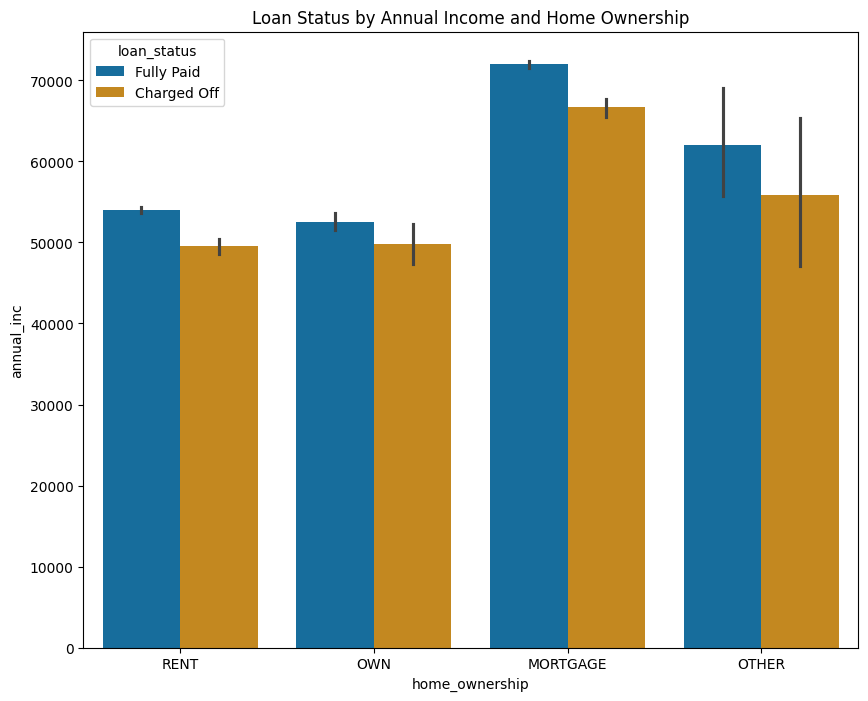

In [425]:
plt.figure(figsize=(10,8))
plt.title('Loan Status by Annual Income and Home Ownership')
sns.barplot(data =loan_Data,y='annual_inc', x='home_ownership', hue ='loan_status',palette="colorblind")
plt.show()

#### Annual income vs Loan amount with hue as loan status

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

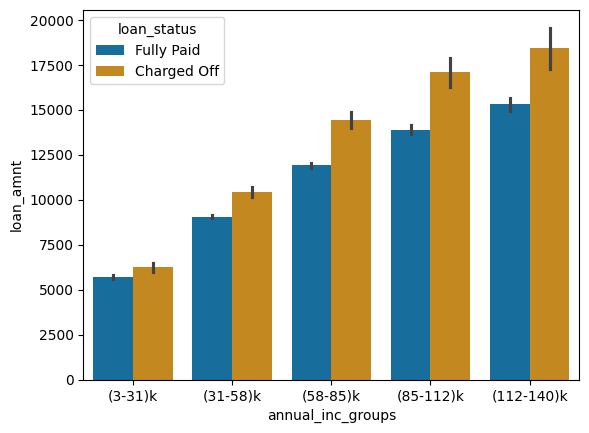

In [426]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_Data, palette="colorblind")

#### Annual income vs Interest Rate with hue as loan status

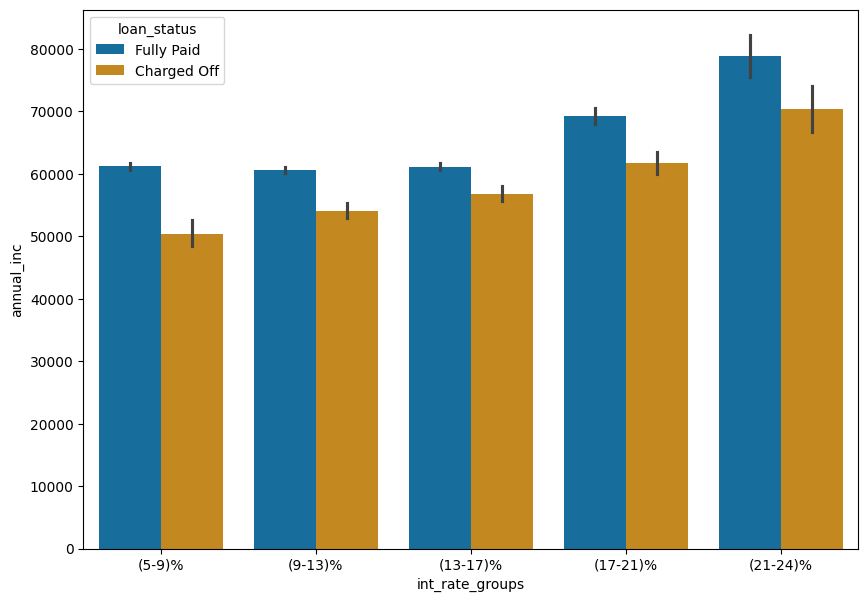

In [427]:
plt.figure(figsize=(10,7))
sns.barplot(data =loan_Data, x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="colorblind")
plt.show()

#### Annual income vs Grade with hue as loan status

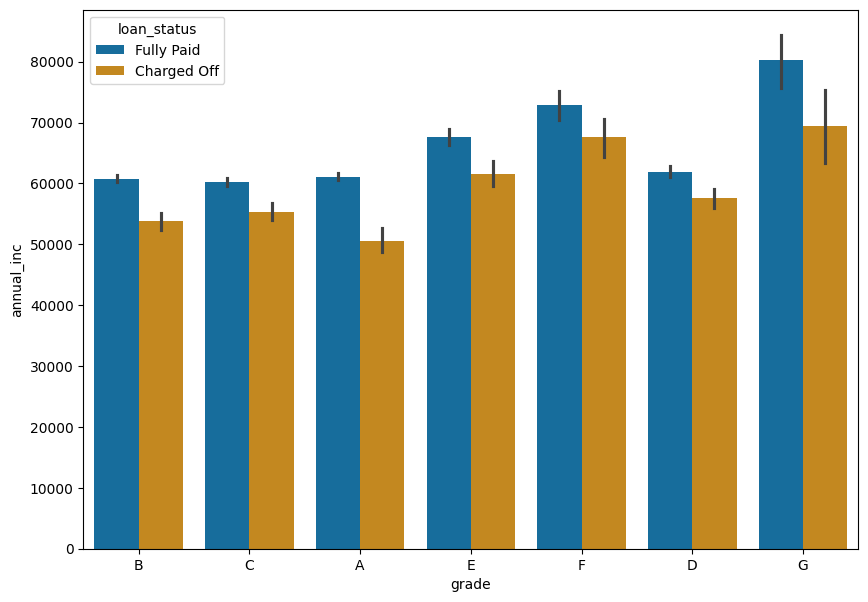

In [428]:
plt.figure(figsize=(10,7))
sns.barplot(data =loan_Data, x='grade', y='annual_inc', hue ='loan_status',palette="colorblind")
plt.show()

### Analysing applicant loan amount with other columns to do more analysis and insights

#### Loan Amount vs Interest Rate with hue as loan status

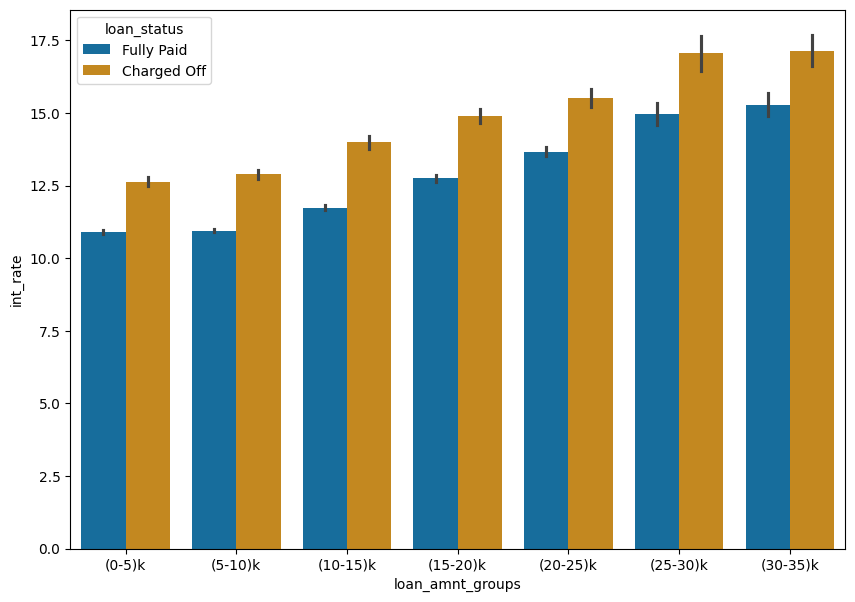

In [429]:
plt.figure(figsize=(10,7))
sns.barplot(data =loan_Data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="colorblind")
plt.show()

#### Loan Amount vs Loan purpose with hue as loan status

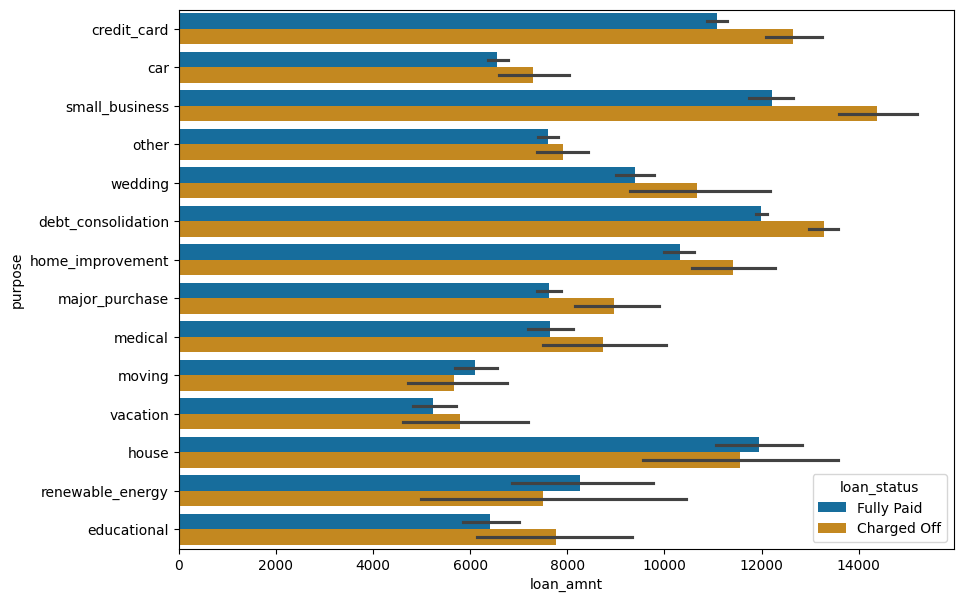

In [430]:
plt.figure(figsize=(10,7))
sns.barplot(data =loan_Data, x='loan_amnt', y='purpose', hue ='loan_status', palette="colorblind")
plt.show()

#### Loan Amount vs House Ownership with hue as loan status

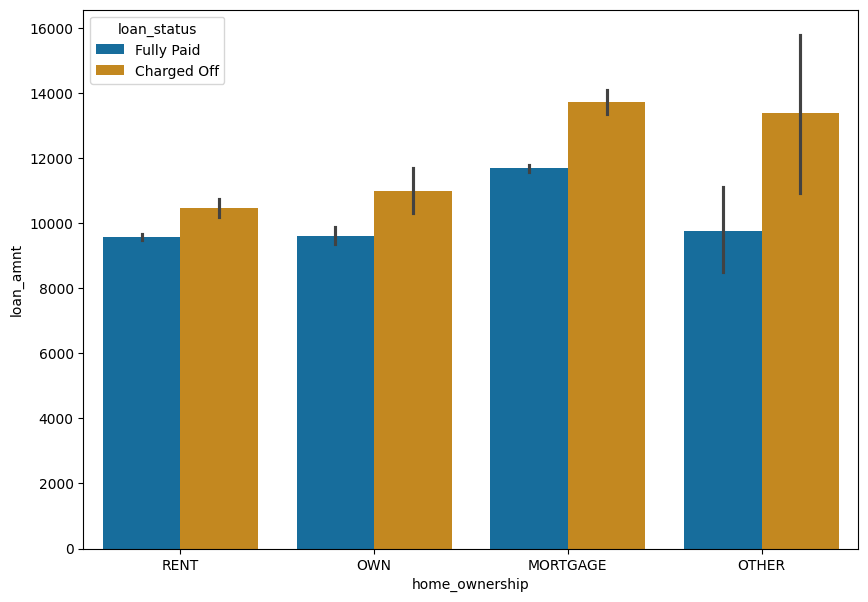

In [431]:
plt.figure(figsize=(10,7))
sns.barplot(data =loan_Data, y='loan_amnt', x='home_ownership', hue ='loan_status',palette="colorblind")
plt.show()

#### Loan Amount vs Issue date with hue as loan status

<Axes: xlabel='issue_month', ylabel='loan_amnt'>

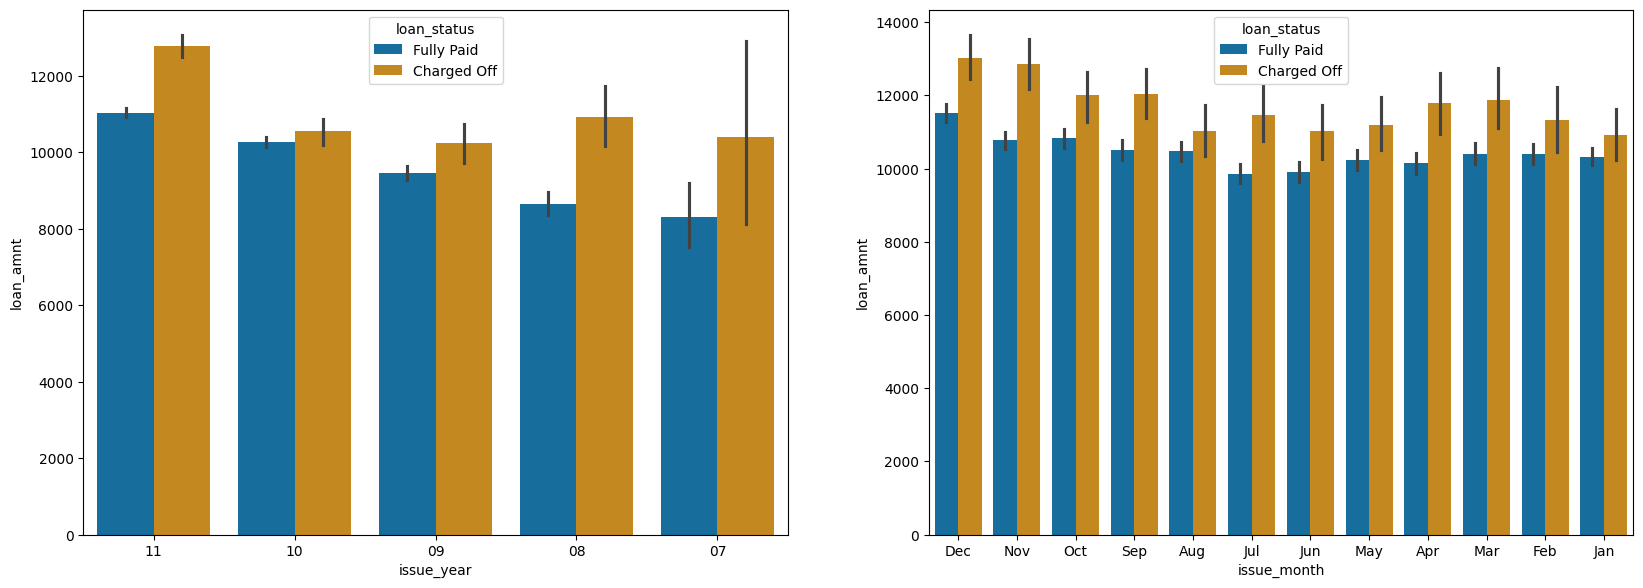

In [432]:
plt.figure(figsize=(20,15))
plt.subplot(221)
sns.barplot(data =loan_Data, y='loan_amnt', x='issue_year', hue ='loan_status',palette="colorblind")
plt.subplot(222)
sns.barplot(data =loan_Data, y='loan_amnt', x='issue_month', hue ='loan_status',palette="colorblind")


#### Loan Amount vs Grade with hue as loan status

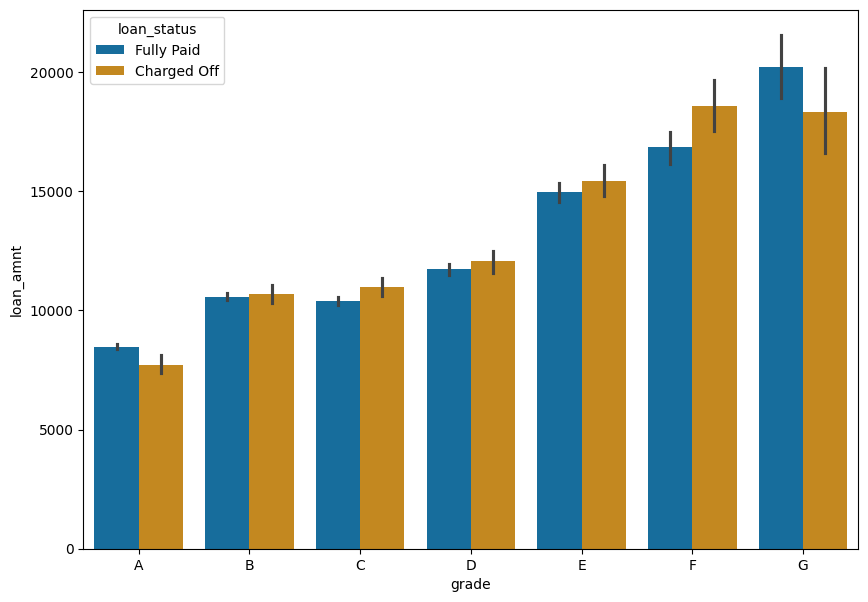

In [433]:
plt.figure(figsize=(10,7))
grade_order=['A','B','C','D','E','F','G']
sns.barplot(data =loan_Data, y='loan_amnt', x='grade', hue ='loan_status',palette="colorblind", order=grade_order)
plt.show()

#### Loan Amount vs Employement length with hue as loan status

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

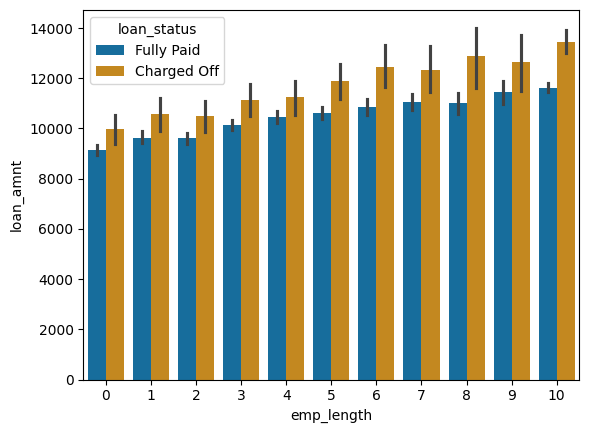

In [434]:
sns.barplot(data =loan_Data, y='loan_amnt', x='emp_length', hue ='loan_status',palette="colorblind",order=emp_length_order)

#### Loan Amount vs Verification status with hue as loan status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

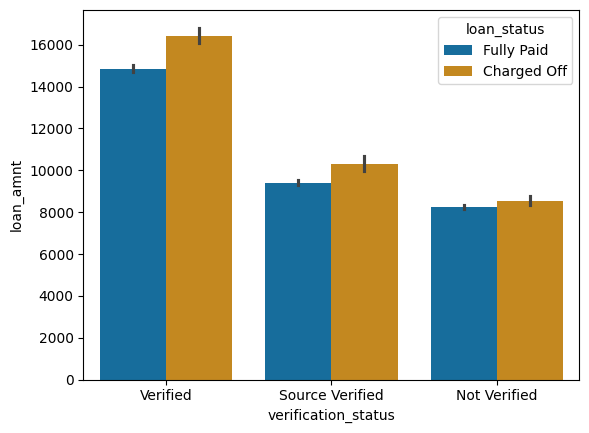

In [435]:
sns.barplot(data =loan_Data, y='loan_amnt', x='verification_status', hue ='loan_status',palette="colorblind")

# Analysis and Observations for future loan defaulting

### From above analysis of other columns wrt charged off loans. Probability of defaulting when : 

- Loan purpose 'home improvement' and an annual income of (60-70)k
- Home ownership is 'MORTGAGE and have income of (60-70)k
- Annual Income groups (112-140)k and Loan amount 17500-20000 
- Interest at the rate of 21-24% and an annual income of (70-80)k
- Grade is 'G' and annual income of (70-80)k
- Loan amount group (30-35)k and are interest rate of (15.0-17.5) %
- Loan purpose for small business and the loan amount>14k
- Home ownership is 'MORTGAGE' and loan amount of (14-16)k
- Loan issue year 2011 and loan amount > 12k
- Loan issue month December and loan amount>(12-14)k
- Grade is F and loan amount is between (15-20)k
- Employment length is 10 years and loan amount is (12-14)k 
- Loan verification status is 'Verified' and loan amount is > 16k